In [1]:
import pandas as pd
from helpers import (clean_data, get_pearson, get_max, get_min, scatter_plot,
                        p_values_paired, p_values_ind, compare)

In [2]:
healthy = pd.read_csv('lusc-rsem-fpkm-tcga_paired.txt', sep='\t')
cancerous = pd.read_csv('lusc-rsem-fpkm-tcga-t_paired.txt', sep='\t')

In [3]:
healthy

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19644,RP1-66C13.4,0,0.00,0.00,1.79,3.32,0.00,0.00,1.79,0.00,...,0.00,4.86,0.00,0.00,2.81,2.84,0.00,0.00,1.08,0.00
19645,C3orf79,152118,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,0.00,0.00
19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


In [4]:
cancerous

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,420.68,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
19644,RP1-66C13.4,0,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,...,0.00,31.00,1.83,0.00,3.32,5.73,0.00,3.03,0.00,0.00
19645,C3orf79,152118,2.27,1.66,0.00,1.22,0.00,0.00,0.00,0.00,...,0.00,5.50,0.00,0.00,0.00,2.86,0.00,1.04,1.50,0.00
19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,15.56,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


## Cleaning the Data
In this step we created a filter to drop all the rows which contain a number of zeros that exceeds the threshold.<br/>
This step is done at the very beginning before both Correlation and Hypothesis Testing

In [5]:
clean_data(healthy, cancerous, 25)

Now We can see that the number of rows decreased from 19648 to 17284 as we applied 50% filter

In [6]:
healthy

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19641,ZNF521,25925,215.77,148.09,83.45,232.94,167.90,80.01,161.02,104.42,...,145.02,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26
19642,SPINT2,10653,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,6516.03,...,3955.48,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55
19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


In [7]:
cancerous

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,...,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,...,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,...,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,...,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,...,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19641,ZNF521,25925,37.32,76.71,59.97,84.04,14.24,202.66,435.55,59.55,...,22.59,33.78,148.09,106.63,297.17,22.26,25.72,106.63,71.00,37.05
19642,SPINT2,10653,56265.94,3901.01,16843.62,12244.81,37901.36,8479.89,9606.86,10959.30,...,18052.61,15392.14,20030.74,20593.91,9808.75,11189.60,10733.74,10014.87,6983.79,23169.48
19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,420.68,...,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,15.56,...,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


---

# Correlation

In [8]:
correlation, indexes = get_pearson(healthy, cancerous)

In [11]:
max_key, max_values, max_indexes = get_max(correlation, indexes)

In [12]:
print(max_key, max_values, max_indexes)

['AREGB'] 0.9690441442970706 [10792]


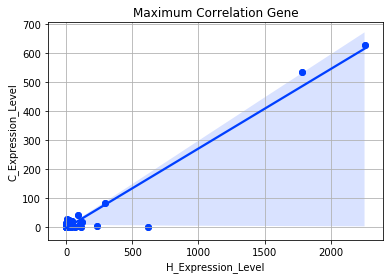

In [13]:
scatter_plot(healthy, cancerous, max_indexes[0], xlabel='H_Expression_Level', ylabel='C_Expression_Level', title='Maximum Correlation Gene')

In [23]:
min_key, min_values, min_indexes = get_min(correlation, indexes)

In [24]:
print(min_key, min_values, min_indexes)

-0.4528072785247083 ['FAM222B'] [12933]


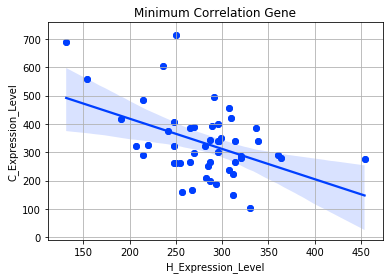

In [25]:
scatter_plot(healthy, cancerous, min_indexes[0], xlabel='H_Expression_Level', ylabel='C_Expression_Level', title='Minimum Correlation Gene')

---

# Hypothesis Testing

In [14]:
diffrentially_genes_paired = p_values_paired(healthy, cancerous, 0.05)

In [15]:
diffrentially_genes_paired

,Gene_name,p-values,p-values_fdr,significance:p_vlaue,significance:p_vlaue_fdr
0,HIST3H2A,4.043607e-08,1.449092e-07,True,True
2,LXN,2.322367e-04,4.580600e-04,True,True
3,CNKSR2,3.420577e-12,2.447072e-11,True,True
6,GSDMD,3.041721e-06,8.119399e-06,True,True
7,AKR1C1,1.938575e-05,4.548782e-05,True,True
...,...,...,...,...,...
17279,ZNF521,4.142164e-06,1.082122e-05,True,True
17280,SPINT2,2.452619e-07,7.759667e-07,True,True
17281,HAVCR2,2.435125e-13,2.160611e-12,True,True
17282,CTD-2116N17.1,4.129496e-11,2.419465e-10,True,True


In [16]:
diffrentially_genes_ind = p_values_ind(healthy, cancerous, 0.05)

In [17]:
diffrentially_genes_ind

,Gene_name,p-values,p-values_fdr,significance:p_vlaue,significance:p_vlaue_fdr
0,HIST3H2A,3.607140e-09,1.373861e-08,True,True
2,LXN,8.164044e-05,1.718516e-04,True,True
3,CNKSR2,6.374652e-15,5.019566e-14,True,True
6,GSDMD,5.344289e-06,1.334644e-05,True,True
7,AKR1C1,7.857877e-06,1.918028e-05,True,True
...,...,...,...,...,...
17279,ZNF521,2.273493e-06,5.978253e-06,True,True
17280,SPINT2,5.250215e-08,1.715725e-07,True,True
17281,HAVCR2,1.228186e-14,9.310511e-14,True,True
17282,CTD-2116N17.1,1.068283e-12,6.280344e-12,True,True


In [18]:
common, paired_only, ind_only = compare(diffrentially_genes_paired, diffrentially_genes_ind)

In [19]:
print(len(common), len(paired_only), len(ind_only))

12217 169 79


In [20]:
common

,Gene_name,p-values,p-values_fdr,significance:p_vlaue,significance:p_vlaue_fdr
0,HIST3H2A,4.043607e-08,1.449092e-07,True,True
2,LXN,2.322367e-04,4.580600e-04,True,True
3,CNKSR2,3.420577e-12,2.447072e-11,True,True
6,GSDMD,3.041721e-06,8.119399e-06,True,True
7,AKR1C1,1.938575e-05,4.548782e-05,True,True
...,...,...,...,...,...
17279,ZNF521,4.142164e-06,1.082122e-05,True,True
17280,SPINT2,2.452619e-07,7.759667e-07,True,True
17281,HAVCR2,2.435125e-13,2.160611e-12,True,True
17282,CTD-2116N17.1,4.129496e-11,2.419465e-10,True,True


In [21]:
paired_only

,Gene_name,p-values,p-values_fdr,significance:p_vlaue,significance:p_vlaue_fdr
40,RDH14,0.030777,0.043388,True,True
351,ZNF354A,0.026471,0.037725,True,True
384,PLAC8L1,0.024546,0.035193,True,True
545,MTPN,0.028947,0.040976,True,True
549,LAMTOR3,0.021953,0.031709,True,True
...,...,...,...,...,...
16927,ROGDI,0.029067,0.041132,True,True
16994,KLHL25,0.031875,0.044805,True,True
17006,GTF2I,0.032056,0.045045,True,True
17010,RARB,0.028808,0.040799,True,True


In [22]:
ind_only

,Gene_name,p-values,p-values_fdr,significance:p_vlaue,significance:p_vlaue_fdr
34,SHKBP1,0.033422,0.047229,True,True
146,TDRKH,0.034131,0.048142,True,True
530,NMBR,0.035077,0.049343,True,True
1098,GALE,0.033301,0.047079,True,True
1997,IQCJ-SCHIP1,0.034402,0.048491,True,True
...,...,...,...,...,...
15649,CCDC102A,0.027195,0.039004,True,True
15914,GM2A,0.029711,0.042331,True,True
16319,CP,0.034484,0.048596,True,True
16435,ITPR3,0.028292,0.040467,True,True
